# **ML code written on Oct,26, 2022** # 

*wawfmp15222*

resources -> https://www.kaggle.com/code/franoisboyer/simplified-decision-trees ,,

https://www.kaggle.com/code/faressayah/decision-trees-random-forest-for-beginners ,,


the dataset is from : https://www.kaggle.com/datasets/mariosfish/default-of-credit-card-clients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
from graphviz import Source
from IPython.display import SVG

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import (f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, 
classification_report, roc_auc_score, roc_curve, precision_score, recall_score)

In [2]:
credit = pd.read_csv("../input/default-of-credit-card-clients/default of credit card clients.csv")

# **Basic EDA** # 

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [6]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm'],
      dtype='object')

In [8]:
credit.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dpnm         int64
dtype: object

In [9]:
credit.shape

(30000, 25)

# **Exploratory Data Analysis** # 

In [10]:
# drop id column because it is same as index column
credit = credit.drop(["ID"], axis=1)

In [11]:
# searching for null values
credit.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

there is no null values in the dataset :)

In [12]:
# now searching for duplicate values
credit.duplicated().sum()

35

In [13]:
# remove the duplicate values
credit = credit.drop_duplicates()

# visualization # 

<AxesSubplot:>

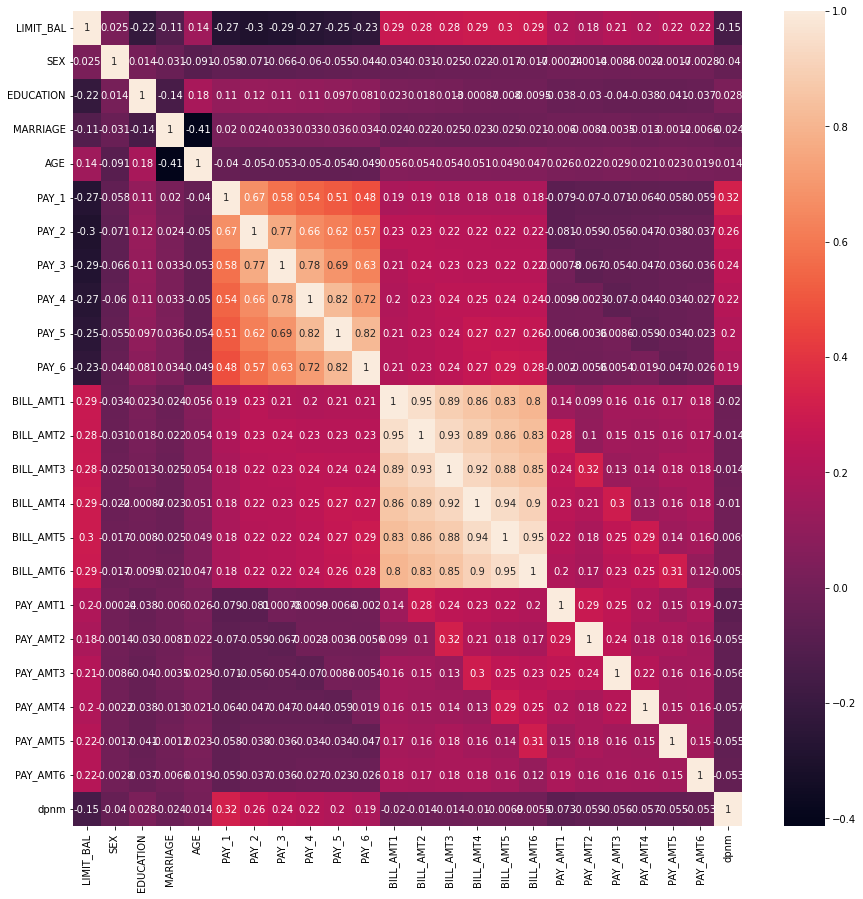

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(credit.corr(),annot=True)

<AxesSubplot:>

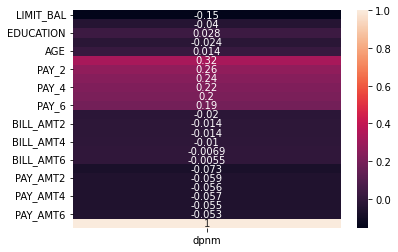

In [15]:
# heatmap corr for the target variable
corr = credit.corr()[['dpnm']]
sns.heatmap(corr, annot=True)

due to small size of numbers in the previous fig we will print the corr as follows:

In [16]:
corr = credit.corr()[['dpnm']]
corr

,dpnm
LIMIT_BAL,-0.153871
SEX,-0.039742
EDUCATION,0.028017
MARRIAGE,-0.024019
AGE,0.013619
PAY_1,0.324964
PAY_2,0.263656
PAY_3,0.235230
PAY_4,0.216551
PAY_5,0.204059


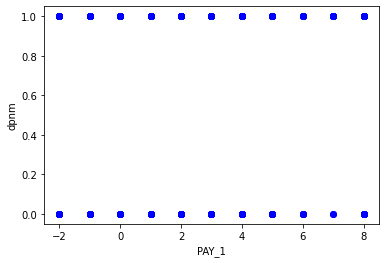

In [17]:
plt.scatter(credit['PAY_1'], credit['dpnm'], color='blue')
plt.xlabel('PAY_1')
plt.ylabel('dpnm')
plt.show()

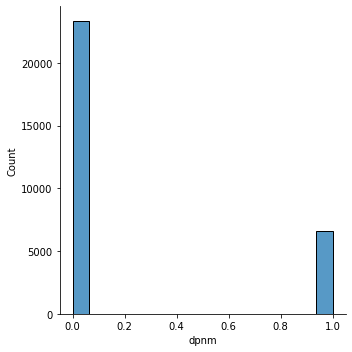

In [18]:
sns.displot(credit['dpnm'])


In [19]:
# skewness
credit['dpnm'].skew()

1.3430975413591204

the value of skew is greater than 1(positive, tail longer to the right), the data are highly skewed

so we gonna to use log transformation to reduce the skew

# split the data # 

In [20]:
x = credit.drop('dpnm', axis=1)
y = credit['dpnm']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
print("x_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)

x_train shape:  (20975, 23) y_train shape:  (20975,)


In [23]:
print("x_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)

x_test shape:  (8990, 23) y_test shape:  (8990,)


# **Modeling** # 

In [25]:
D_tree = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=25)
D_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=25)

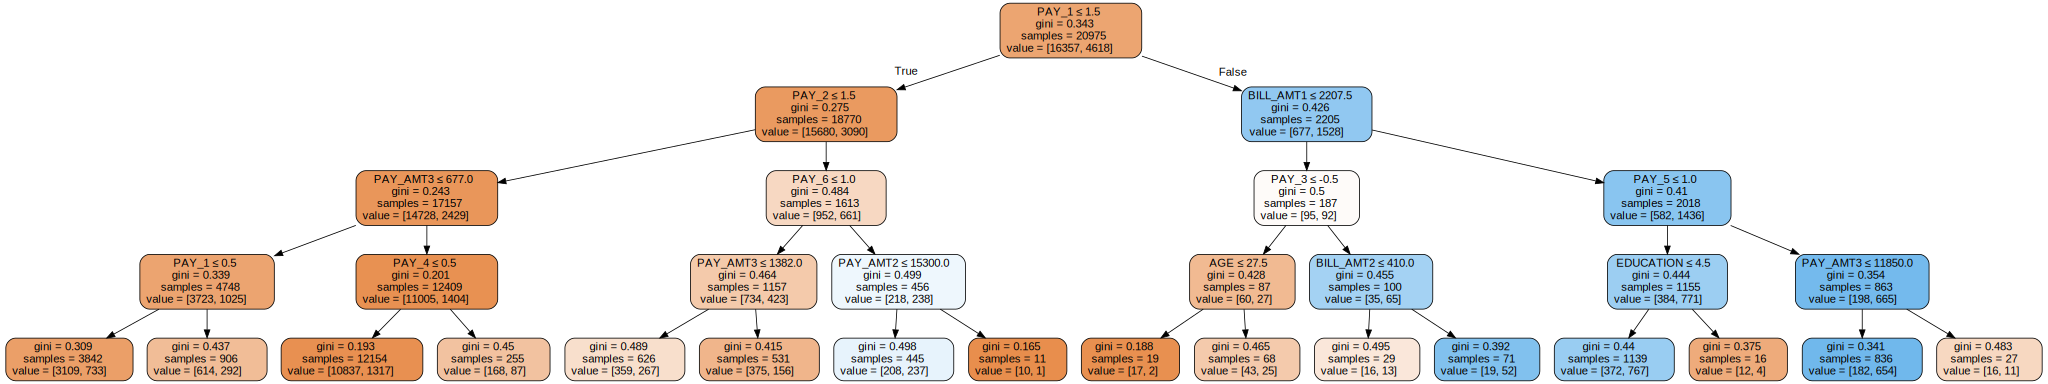

In [26]:
# plot the tree
dot_data = tree.export_graphviz(D_tree, out_file=None, feature_names=x.columns,
                               filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph 

In [27]:
# Make predictions.
tree_pred=D_tree.predict(X_test)

In [28]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % D_tree.score(X_test, y_test))
# Precision
print('Precision: %.3f' % precision_score(y_test, tree_pred))
# Recall
print('Recall: %.3f' % recall_score(y_test, tree_pred))
# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, tree_pred))

Accuracy: 0.820
Precision: 0.687
Recall: 0.358
F1 score: 0.471


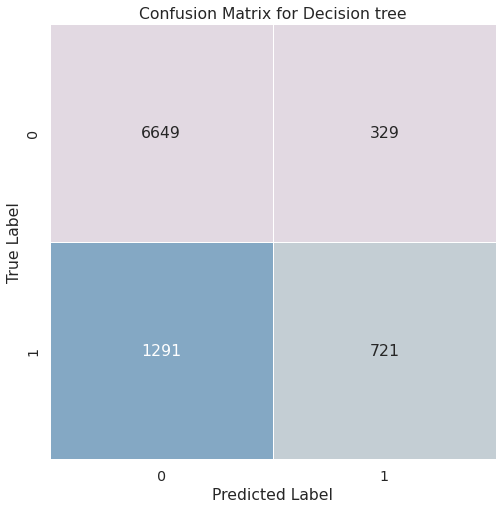

In [29]:
# Plot confusion matrix for Decision tree
tree_matrix = confusion_matrix(y_test,tree_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(tree_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');